# Auckland Housing

In [1]:
import pandas as pd
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Importing the csv dataset as a pandas dataframe called house_prices

house_prices = pd.read_csv("https://raw.githubusercontent.com/NZMSA/2020-Phase-1/master/Machine%20Learning%20and%20Data%20Science/Dataset%20for%20Assignment.csv")
house_prices.head()

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  
0           24           21           24         21     Manurewa  
1           12           21           15         30       Karaka  
2           12           21           15         30       Karaka  
3           21           21           12         15     Onehunga  
4           33           30           21         33  Clover Park




### Creating a sample dataset and adding the '2018 Census Population' column to it

In [5]:
"""Function to retrieve the values from the 'C18_CURPop' using the API key provided along with the Longtitude 
   and Latitude in the dataframe to form the 2018 Census Population column for the dataframes
    
   Args:
       row (integer): index of each row within the dataframe
       dataset (object): name of the dataset into which the 2018 Census Population column must be formed for
       
   Returns:
       none

"""

def extract_json_1(row, dataset):
    
    params = {
    'key' : '816b359174ef44dda9acefe7479b4b12',
    'layer': 104612,
    'x': house_prices.Longitude[row],
    'y': house_prices.Latitude[row]
    }
    
    response = requests.get('https://koordinates.com/services/query/v1/vector.json', params=params)
    df = pd.read_json(response.url)
    nycphil = json_normalize(df['vectorQuery']['layers']['104612']['features'][0]['properties'])
    
    dataset.loc[row, '2018 Census Population'] = nycphil['C18_CURPop'][0]

In [6]:
"""Test Function to retrieve the values from the 'C18_CURPop' using the API key provided along with the Longtitude and Latitude in the dataframe
    
   Args:
       row (integer): index of the row row within the dataframe
       
   Returns:
       pandas series containing the value of the 2018 Census Population for the index of that row

"""

def extract_json(row):
    
    params = {
    'key' : '816b359174ef44dda9acefe7479b4b12',
    'layer': 104612,
    'x': house_prices.Longitude[row],
    'y': house_prices.Latitude[row]
    }
    
    response = requests.get('https://koordinates.com/services/query/v1/vector.json', params=params)
    df = pd.read_json(response.url)
    nycphil = json_normalize(df['vectorQuery']['layers']['104612']['features'][0]['properties'])
    
    return pd.Series({'2018 Census Population': nycphil['C18_CURPop'][0]})

In [80]:
# Forming the sample dataframe from the house_prices dataframe

sample = house_prices.head()

In [84]:
# Sample dataframe before the 2018 Census Population has been added

sample

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  
0           24           21           24         21     Manurewa  
1           12           21           15         30       Karaka  
2           12           21           15         30       Karaka  
3           21           21           12         15     Onehunga  
4           33           30           21         33  Clover Park

In [86]:
#Iterrating through each row of the sample dataframe to add the values to the 2018 Census Population column

for index, row in sample.iterrows():
    extract_json_1(index, sample)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
# Sample dataframe after the 2018 Census Population has been added

sample

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018 Census Population  
0                   174.0  
1                   129.0  
2                   129.0  
3                   120.0  
4                   231.0

In [8]:
#Finding the expected value of the 2018 Census Population for each row of the dataframe

extract_json(4)

2018 Census Population    231
dtype: int64





### Applying the extract_json function to the house_prices dataset

In [91]:
#Iterrating through each row of the house_prices dataframe to add the values to the 2018 Census Population column

for index, row in house_prices.iterrows():
    extract_json_1(index, house_prices)

In [92]:
house_prices.head()

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018 Census Population  
0                   174.0  
1                   129.0  
2                   129.0  
3                   120.0  
4                   231.0

In [93]:
# Saving the housing_prices dataframe as a CSV file. This will help save a lot of time compared to loading the dataframe
# from time to time

house_prices.to_csv('Auckland_Housing_2018')




### Creating a function to extract the Deprevation index and score to and add it to the dataframe

In [2]:
Housing_2018 = pd.read_csv('Auckland_Housing_2018')
del Housing_2018['Unnamed: 0']
Housing_2018.head()

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018 Census Population  
0                   174.0  
1                   129.0  
2                   129.0  
3                   120.0  
4                   231.0

In [3]:
# A measure of the socioeconomic status within each area of NZ
# Deprivation Index (Scale of deprivation) - 1: least deprived areas, 10: Most deprived areas

Dep_ind = pd.read_excel('otago730393.xlsx')
Dep_ind.head()

MB2018_code  NZDep2018  NZDep2018_Score  SA12018_code
0          100       10.0           1245.0       7000000
1          200       10.0           1245.0       7000000
2          300       10.0           1245.0       7000000
3          400       10.0           1245.0       7000001
4          501        NaN              NaN       7000002

In [4]:
Dep_ind = Dep_ind.rename(columns={'SA12018_code': 'SA1'})
Dep_ind = Dep_ind.drop(['MB2018_code'], axis=1)
Dep_ind.head()

NZDep2018  NZDep2018_Score      SA1
0       10.0           1245.0  7000000
1       10.0           1245.0  7000000
2       10.0           1245.0  7000000
3       10.0           1245.0  7000001
4        NaN              NaN  7000002

In [5]:
# Creating a sample dataset and merging the contents of the Dep_ind dataframe to it using the SA1 column
sample_dep = Housing_2018.head()
sample_dep

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018 Census Population  
0                   174.0  
1                   129.0  
2                   129.0  
3                   120.0  
4                   231.0

In [6]:
sample_dep = sample_dep.merge(Dep_ind, on='SA1', how='left')
sample_dep

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   
5         3        1.0     59 Israel Avenue Clover Park, Auckland       601   
6         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   
5   630000 -36.979037  174.892612  7008902          93           27   
6   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   
5           33           30           21         33  Clover Park   
6           33           30           21         33  Clover Park   

   2018 Census Population  NZDep2018  NZDep2018_Score  
0                   174.0        6.0            997.0  
1                   129.0        1.0            881.0  
2                   129.0        1.0            881.0  
3                   120.0        2.0            908.0  
4                   231.0        9.0           1091.0  
5                   231.0        9.0           1091.0  
6                   231.0        9.0           1091.0

In [7]:
# Now merging the columns to the actual dataset, Housing_2018

Housing_2018 = Housing_2018.merge(Dep_ind, on='SA1', how='left')
Housing_2018.head(6)

Bedrooms  Bathrooms                                    Address Land area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   
5         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19 years  20-29 years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   
5   630000 -36.979037  174.892612  7008902          93           27   

   30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   
5           33           30           21         33  Clover Park   

   2018 Census Population  NZDep2018  NZDep2018_Score  
0                   174.0        6.0            997.0  
1                   129.0        1.0            881.0  
2                   129.0        1.0            881.0  
3                   120.0        2.0            908.0  
4                   231.0        9.0           1091.0  
5                   231.0        9.0           1091.0

### Cleaning the Housing_2018 dataframe

In [8]:
#Checking if the dataset has any null values

Housing_2018.isnull().values.any()

True

In [9]:
Housing_2018.isnull().sum()

Bedrooms                  0
Bathrooms                 2
Address                   0
Land area                 0
CV                        0
Latitude                  0
Longitude                 0
SA1                       0
0-19 years                0
20-29 years               0
30-39 years               0
40-49 years               0
50-59 years               0
60+ years                 0
Suburbs                   3
2018 Census Population    0
NZDep2018                 0
NZDep2018_Score           0
dtype: int64

In [10]:
# From above, we can see that there are 2 null values in the Bathrooms column and 3 null values in the Suburbs column
#Finding the rows where Bathrooms = null

Housing_2018[Housing_2018.Bathrooms.isnull()]

Bedrooms  Bathrooms                            Address Land area  \
436         4        NaN  14 Hea Road Hobsonville, Auckland       214   
438         4        NaN  16 Hea Road Hobsonville, Auckland       245   

          CV   Latitude  Longitude      SA1  0-19 years  20-29 years  \
436  1250000 -36.798371  174.64743  7002267          60           66   
438  1100000 -36.798371  174.64743  7002267          60           66   

     30-39 years  40-49 years  50-59 years  60+ years      Suburbs  \
436           60           24           24         18  Hobsonville   
438           60           24           24         18  Hobsonville   

     2018 Census Population  NZDep2018  NZDep2018_Score  
436                   252.0        2.0            911.0  
438                   252.0        2.0            911.0

In [11]:
#Finding the rows where Suburbs = null

Housing_2018[Housing_2018.Suburbs.isnull()]

Bedrooms  Bathrooms                                            Address  \
821         1        1.0  14 Te Rangitawhiri Road Great Barrier Island, ...   
822         1        1.0  14 Te Rangitawhiri Road Great Barrier Island, ...   
823         1        1.0  14 Te Rangitawhiri Road Great Barrier Island, ...   

    Land area      CV   Latitude   Longitude      SA1  0-19 years  \
821      2141  740000 -36.197282  175.416921  7001131          27   
822      2141  740000 -36.197282  175.416921  7001131          27   
823      2141  740000 -36.197282  175.416921  7001131          27   

     20-29 years  30-39 years  40-49 years  50-59 years  60+ years Suburbs  \
821            6            6           18           39         60     NaN   
822            6            6           18           39         60     NaN   
823            6            6           18           39         60     NaN   

     2018 Census Population  NZDep2018  NZDep2018_Score  
821                   156.0        9.0           1122.0  
822                   156.0        9.0           1122.0  
823                   156.0        9.0           1122.0

In [12]:
# We will be removing these values from the dataset because:

Housing_2018 = Housing_2018.dropna(how='any')
Housing_2018.isnull().values.any()

False

In [13]:
Housing_2018.dtypes

Bedrooms                    int64
Bathrooms                 float64
Address                    object
Land area                  object
CV                          int64
Latitude                  float64
Longitude                 float64
SA1                         int64
0-19 years                  int64
20-29 years                 int64
30-39 years                 int64
40-49 years                 int64
50-59 years                 int64
60+ years                   int64
Suburbs                    object
2018 Census Population    float64
NZDep2018                 float64
NZDep2018_Score           float64
dtype: object

In [14]:
# Removing the spaces in the column names

Housing_2018.columns = Housing_2018.columns.str.replace(' ', '_')
Housing_2018.head()

Bedrooms  Bathrooms                                    Address Land_area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland       714   
1         5        3.0             8 Corsica Way Karaka, Auckland       564   
2         6        4.0     243 Harbourside Drive Karaka, Auckland       626   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland        65   
4         3        1.0     59 Israel Avenue Clover Park, Auckland       601   

        CV   Latitude   Longitude      SA1  0-19_years  20-29_years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39_years  40-49_years  50-59_years  60+_years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018_Census_Population  NZDep2018  NZDep2018_Score  
0                   174.0        6.0            997.0  
1                   129.0        1.0            881.0  
2                   129.0        1.0            881.0  
3                   120.0        2.0            908.0  
4                   231.0        9.0           1091.0

In [15]:
# From Above, the Land_area field has the object data type
# This is due to the instances of the land area recorded with its units, m^2
# We will be removing that and convert this field into a float

Housing_2018['Land_area'] = Housing_2018.Land_area.str.extract('(\d+)').astype(float)
Housing_2018.head()

Bedrooms  Bathrooms                                    Address  Land_area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland      714.0   
1         5        3.0             8 Corsica Way Karaka, Auckland      564.0   
2         6        4.0     243 Harbourside Drive Karaka, Auckland      626.0   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland       65.0   
4         3        1.0     59 Israel Avenue Clover Park, Auckland      601.0   

        CV   Latitude   Longitude      SA1  0-19_years  20-29_years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39_years  40-49_years  50-59_years  60+_years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018_Census_Population  NZDep2018  NZDep2018_Score  
0                   174.0        6.0            997.0  
1                   129.0        1.0            881.0  
2                   129.0        1.0            881.0  
3                   120.0        2.0            908.0  
4                   231.0        9.0           1091.0

In [16]:
Housing_2018.dtypes

Bedrooms                    int64
Bathrooms                 float64
Address                    object
Land_area                 float64
CV                          int64
Latitude                  float64
Longitude                 float64
SA1                         int64
0-19_years                  int64
20-29_years                 int64
30-39_years                 int64
40-49_years                 int64
50-59_years                 int64
60+_years                   int64
Suburbs                    object
2018_Census_Population    float64
NZDep2018                 float64
NZDep2018_Score           float64
dtype: object

#### The Land_area field is a float now and all the other fields have the correct data type

## Removing duplicates from the Housing_2018 dataframe

In order to increase the accuracy of the machine learning model, we will be removing any duplicates that are present in the Housing_2018 dataframe.

In [17]:
# finding the rows with duplicates

Housing_2018.duplicated()

0       False
1       False
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9       False
10       True
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1530    False
1531     True
1532    False
1533    False
1534    False
1535     True
1536    False
1537    False
1538     True
1539    False
1540     True
1541    False
1542    False
1543    False
1544     True
1545    False
1546     True
1547    False
1548    False
1549    False
1550     True
1551    False
1552     True
1553     True
1554     True
1555     True
1556    False
1557    False
1558     True
1559    False
Length: 1555, dtype: bool

In [18]:
Housing_2018.duplicated().sum()

515

In [19]:
Housing_2018.loc[Housing_2018.duplicated(), :]

Bedrooms  Bathrooms                                         Address  \
5            3        1.0          59 Israel Avenue Clover Park, Auckland   
6            3        1.0          59 Israel Avenue Clover Park, Auckland   
8            3        1.0      14 Tainui Terrace Mangere Bridge, Auckland   
10           3        1.0           54 Kelmarna Avenue Ponsonby, Auckland   
18           3        1.0           10 Fairlight Place Manurewa, Auckland   
33           2        1.0     72 Stonefields Avenue Stonefields, Auckland   
36           3        2.0       47b Comins Crescent Mission Bay, Auckland   
42           4        1.0                 7 Rata Place Pukekohe, Auckland   
44           4        3.0        19b Hendry Avenue Hillsborough, Auckland   
46           3        2.0           28 Tiraumea Drive Pakuranga, Auckland   
47           3        2.0           28 Tiraumea Drive Pakuranga, Auckland   
58           2        1.0           A/18a Holly Street Avondale, Auckland   
60           4        2.0                      26A Holly Street, Auckland   
65           4        1.0             50 Arthur Street Manurewa, Auckland   
67           3        2.0                  3 Manuka Road Oneroa, Auckland   
72           5        3.0             29b Rukutai Street Orakei, Auckland   
74           4        2.0                    44 Godden Crescent, Auckland   
80           4        3.0               37b Kelvin Road Remuera, Auckland   
82           4        2.0             46 Waiatarua Road Remuera, Auckland   
83           4        2.0             46 Waiatarua Road Remuera, Auckland   
84           4        2.0             46 Waiatarua Road Remuera, Auckland   
87           4        2.0               63 John Street Pukekohe, Auckland   
93           3        2.0         2/13a Easter Parade Glen Eden, Auckland   
95           5        3.0                5a Abbotts Way Remuera, Auckland   
96           5        3.0                5a Abbotts Way Remuera, Auckland   
98           4        1.0                          4 Marua Road, Auckland   
99           4        1.0                          4 Marua Road, Auckland   
101          3        1.0  966 Kaipara Flats Road Kaipara Flats, Auckland   
102          3        1.0  966 Kaipara Flats Road Kaipara Flats, Auckland   
106          4        2.0        50b Camp Road Mount Wellington, Auckland   
...        ...        ...                                             ...   
1465         5        3.0                    4C Rosedale Avenue, Auckland   
1469         3        3.0                26 St Georges Bay Road, Auckland   
1473         4        3.0                        2 Karakia Lane, Auckland   
1480         4        2.0                       47 Ngaroma Road, Auckland   
1482         4        3.0                     16 Kissling Place, Auckland   
1485         7        3.0              1,2 & 3/466 Parnell Road, Auckland   
1489         4        1.0                     181 Taylor Street, Auckland   
1495         2        1.0                   91 Kurahaupo Street, Auckland   
1505         5        3.0                   41A Nihill Crescent, Auckland   
1508         4        3.0                    114A Clonbern Road, Auckland   
1511         4        3.0                     18a Campbell Road, Auckland   
1514         5        3.0                        9 Waitara Road, Auckland   
1516         5        3.0                      13B Waitara Road, Auckland   
1518         5        3.0                        5 Waitara Road, Auckland   
1521         3        1.0                          5 Parry Road, Auckland   
1523         4        2.0                       82 Gowing Drive, Auckland   
1527         3        2.0              Lot 1  6/22 Ngaio Street, Auckland   
1529         4        2.0              167B Blockhouse Bay Road, Auckland   
1531         3        1.0                     133 Mt Smart Road, Auckland   
1535         5        2.0                      23 Stoddard Road, Auckland   
15

##### As from above, there are m,ultiple duplicates in rows 5, 6, 8, 10 etc. In total there are 515 duplicates. We will now remove them

In [20]:
# Initial number of recods before filtering

Housing_2018.shape

(1555, 18)

In [21]:
# No. records after filtering

Housing_2018.drop_duplicates(keep='first', inplace=True)
Housing_2018.shape

(1040, 18)

In [28]:
Housing_2018.describe()

Bedrooms    Bathrooms     Land_area            CV     Latitude  \
count  1040.000000  1040.000000   1040.000000  1.040000e+03  1040.000000   
mean      3.782692     2.074038    850.772115  1.381557e+06   -36.894220   
std       1.171069     0.994353   1581.070983  1.163974e+06     0.128469   
min       1.000000     1.000000     40.000000  2.700000e+05   -37.265021   
25%       3.000000     1.000000    323.000000  7.800000e+05   -36.950487   
50%       4.000000     2.000000    570.500000  1.080000e+06   -36.893455   
75%       4.000000     3.000000    825.000000  1.600000e+06   -36.856094   
max      17.000000     8.000000  22240.000000  1.800000e+07   -36.177655   

         Longitude           SA1   0-19_years  20-29_years  30-39_years  \
count  1040.000000  1.040000e+03  1040.000000  1040.000000  1040.000000   
mean    174.798720  7.006326e+06    47.538462    28.952885    26.982692   
std       0.118222  2.583803e+03    24.760576    21.038594    17.955181   
min     174.317078  7.001130e+06     0.000000     0.000000     0.000000   
25%     174.721131  7.004422e+06    33.000000    15.000000    15.000000   
50%     174.797892  7.006334e+06    45.000000    24.000000    24.000000   
75%     174.880943  7.008383e+06    57.000000    36.000000    33.000000   
max     175.492424  7.011028e+06   201.000000   270.000000   177.000000   

       40-49_years  50-59_years    60+_years  2018_Census_Population  \
count  1040.000000  1040.000000  1040.000000             1040.000000   
mean     24.124038    22.580769    29.313462              179.780769   
std      10.978893    10.224770    21.878873               71.227962   
min       0.000000     0.000000     0.000000                3.000000   
25%      18.000000    15.000000    18.000000              138.000000   
50%      24.000000    21.000000    27.000000              174.000000   
75%      30.000000    27.000000    36.000000              207.000000   
max     114.000000    90.000000   483.000000              789.000000   

         NZDep2018  NZDep2018_Score  
count  1040.000000      1040.000000  
mean      5.066346       986.227885  
std       2.904714        93.536676  
min       1.000000       849.000000  
25%       2.000000       918.000000  
50%       5.000000       959.000000  
75%       8.000000      1030.250000  
max      10.000000      1380.000000

##### As you can see from above, there are multiple houses with up to 17 bedrooms with 8 bathrooms.  

##### The house with the highest current value is about 18 million

##### There are also a far greater number of people who belong to the 60+ years age group compared to the other age groups. 

In [28]:
# No of records in the response variable, NZDep2018, for each of the 10 classes

Housing_2018.groupby('NZDep2018').NZDep2018.count()


NZDep2018
1.0     135
2.0     130
3.0     110
4.0     121
5.0      93
6.0      94
7.0      90
8.0      86
9.0      97
10.0     84
Name: NZDep2018, dtype: int64

In [22]:
Housing_2018.to_csv('Auckland_Housing_2018_cleaned')

## Analysing the dataset

In [2]:
# Importing the cleaned CSV file as a new dataframe ready for analysis

Auckland_Houses_2018 = pd.read_csv('Auckland_Housing_2018_cleaned')
del Auckland_Houses_2018['Unnamed: 0']
Auckland_Houses_2018.head()

Bedrooms  Bathrooms                                    Address  Land_area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland      714.0   
1         5        3.0             8 Corsica Way Karaka, Auckland      564.0   
2         6        4.0     243 Harbourside Drive Karaka, Auckland      626.0   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland       65.0   
4         3        1.0     59 Israel Avenue Clover Park, Auckland      601.0   

        CV   Latitude   Longitude      SA1  0-19_years  20-29_years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39_years  40-49_years  50-59_years  60+_years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018_Census_Population  NZDep2018  NZDep2018_Score  
0                   174.0        6.0            997.0  
1                   129.0        1.0            881.0  
2                   129.0        1.0            881.0  
3                   120.0        2.0            908.0  
4                   231.0        9.0           1091.0

In [71]:
# No. of records in the dataset

Auckland_Houses_2018.count()

Bedrooms                  1040
Bathrooms                 1040
Address                   1040
Land_area                 1040
CV                        1040
Latitude                  1040
Longitude                 1040
SA1                       1040
0-19_years                1040
20-29_years               1040
30-39_years               1040
40-49_years               1040
50-59_years               1040
60+_years                 1040
Suburbs                   1040
2018_Census_Population    1040
NZDep2018                 1040
NZDep2018_Score           1040
dtype: int64

In [72]:
# No. of columns within the dataset

len(Auckland_Houses_2018.columns)

18

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd436dfa58>,
      dtype=object)

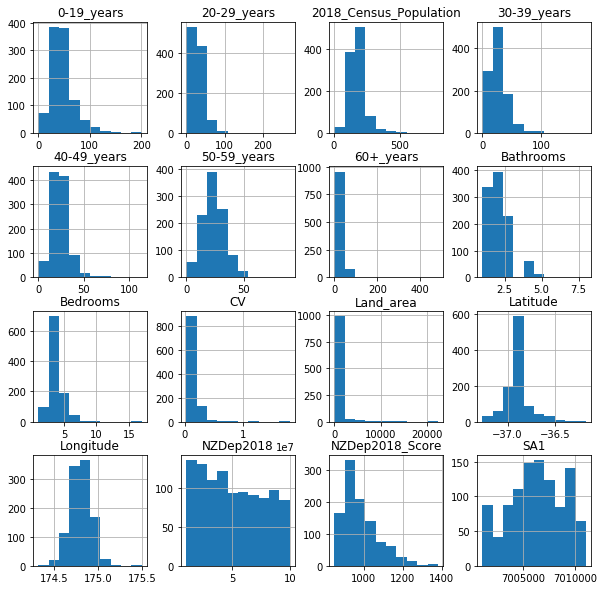

In [26]:
Auckland_Houses_2018.hist(figsize=(10,10))

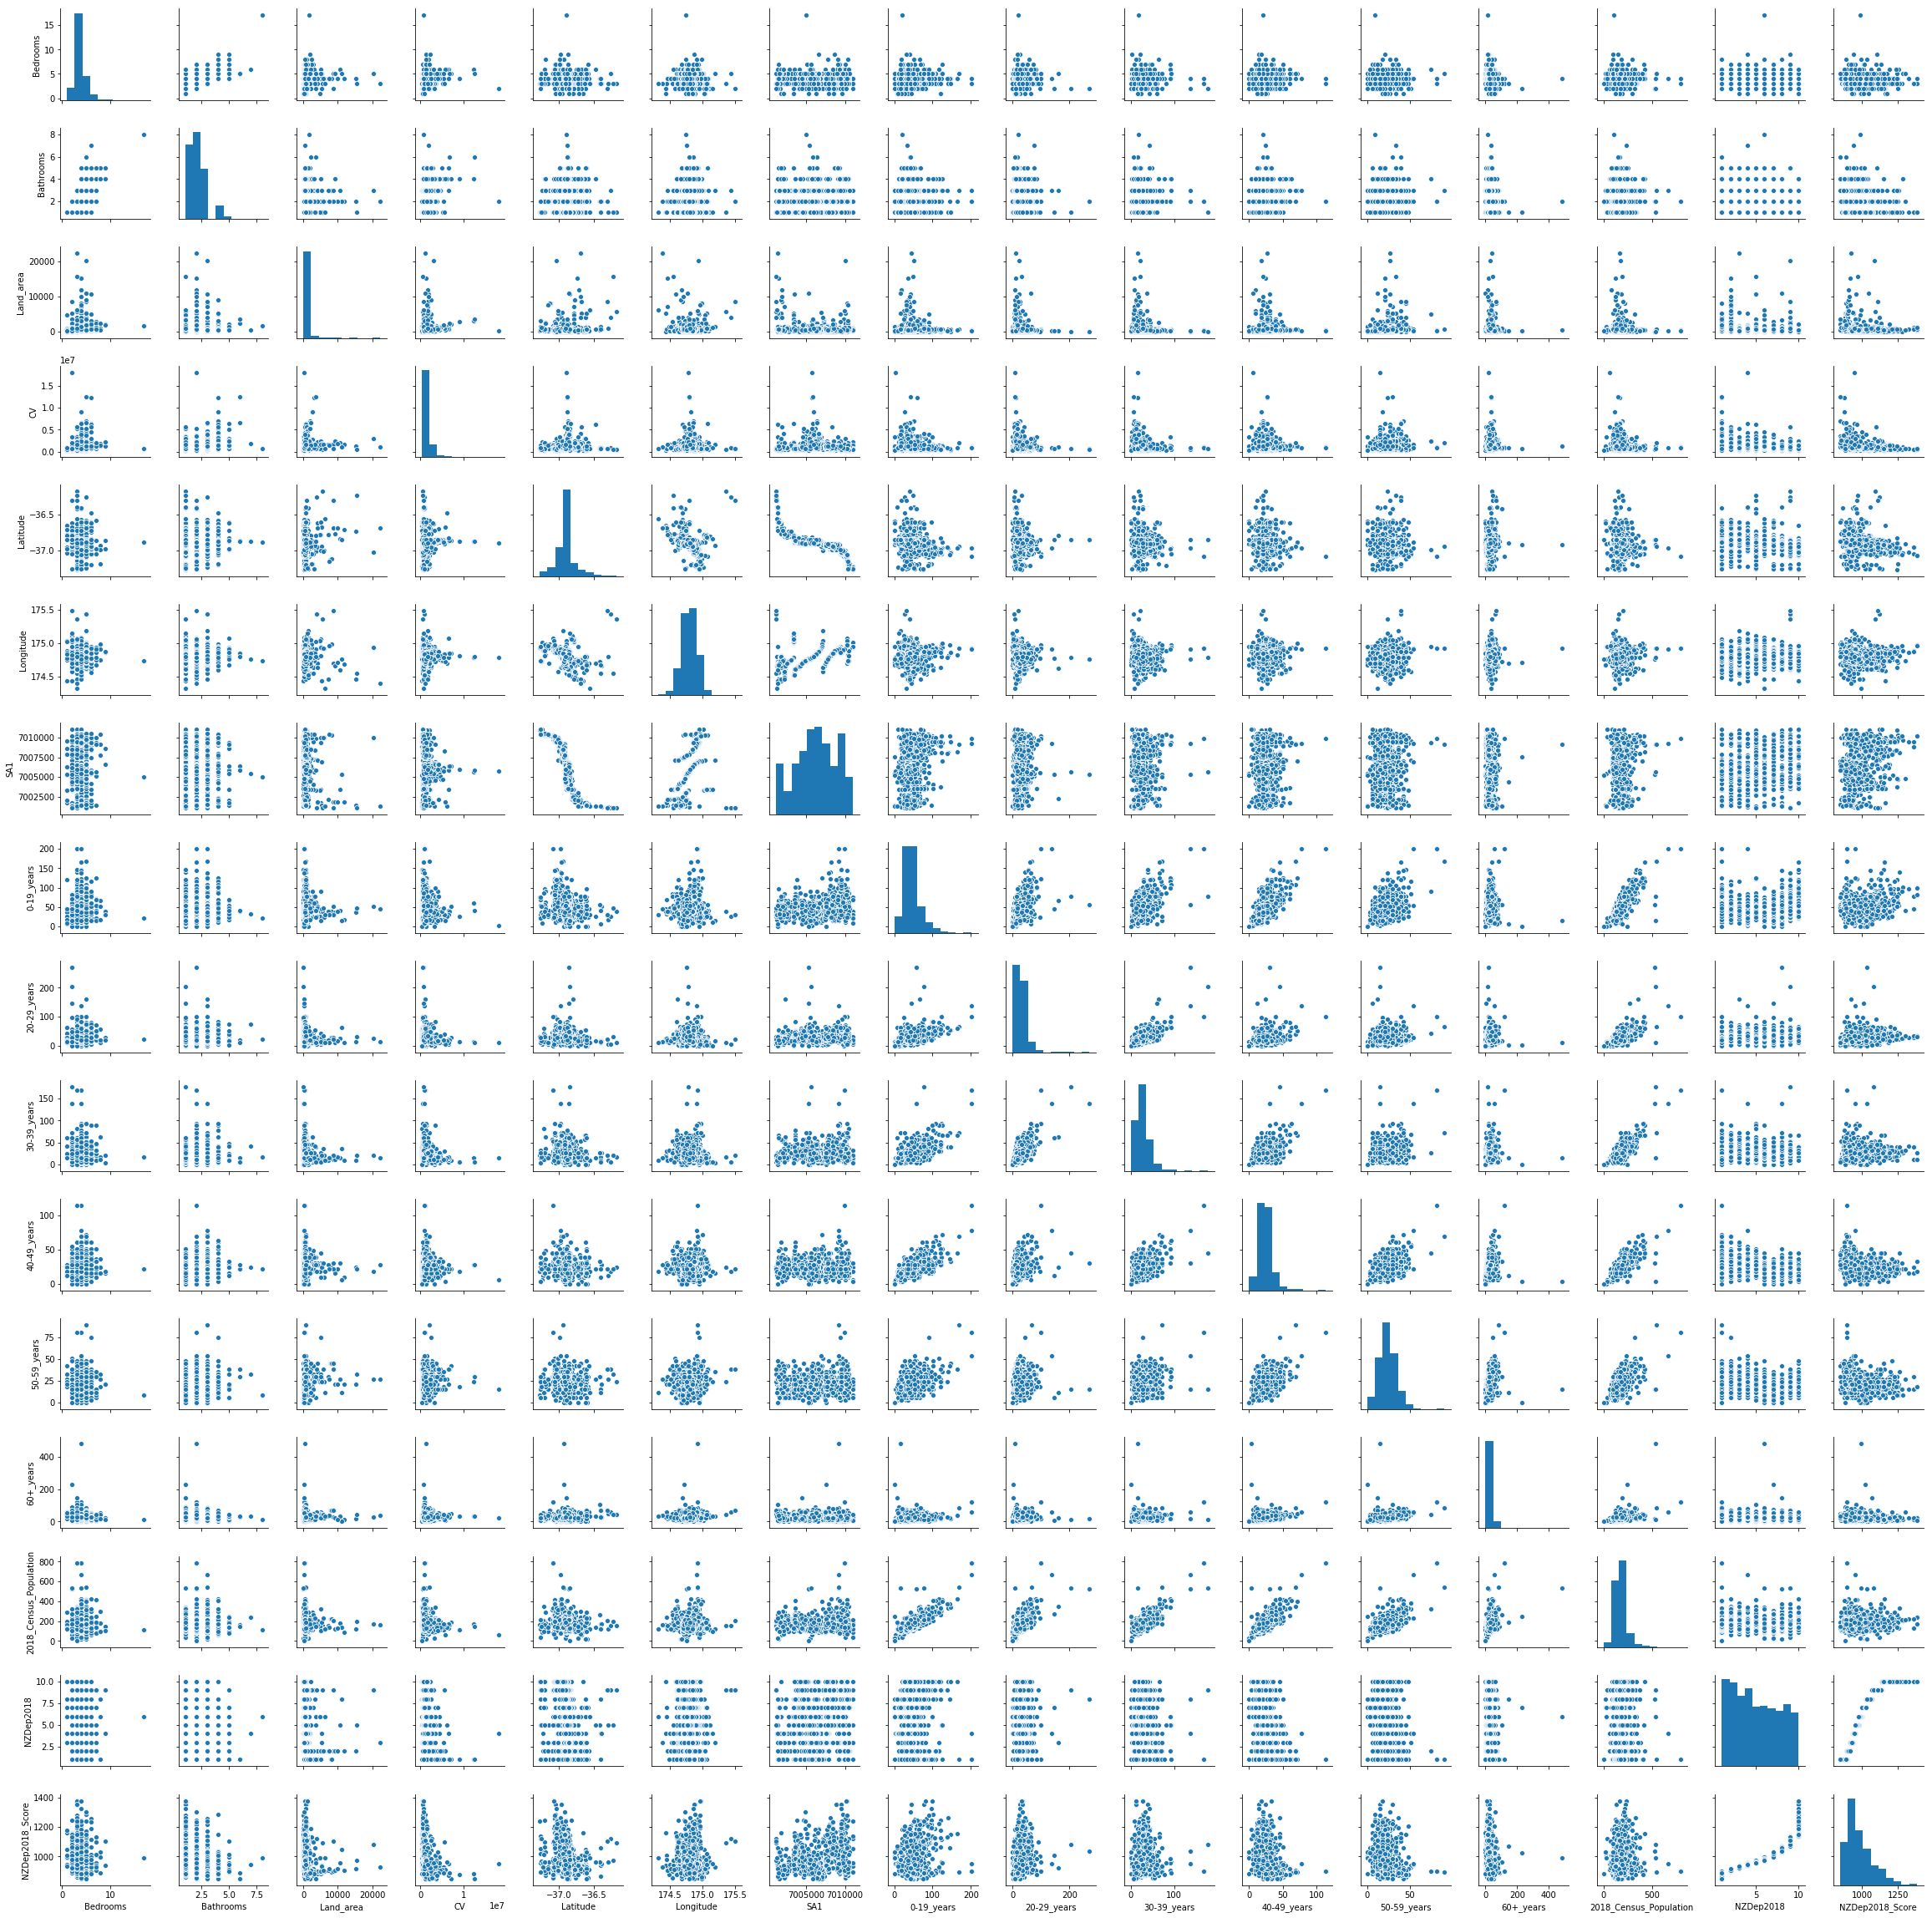

In [27]:
sns.pairplot(Auckland_Houses_2018, height = 2.0)

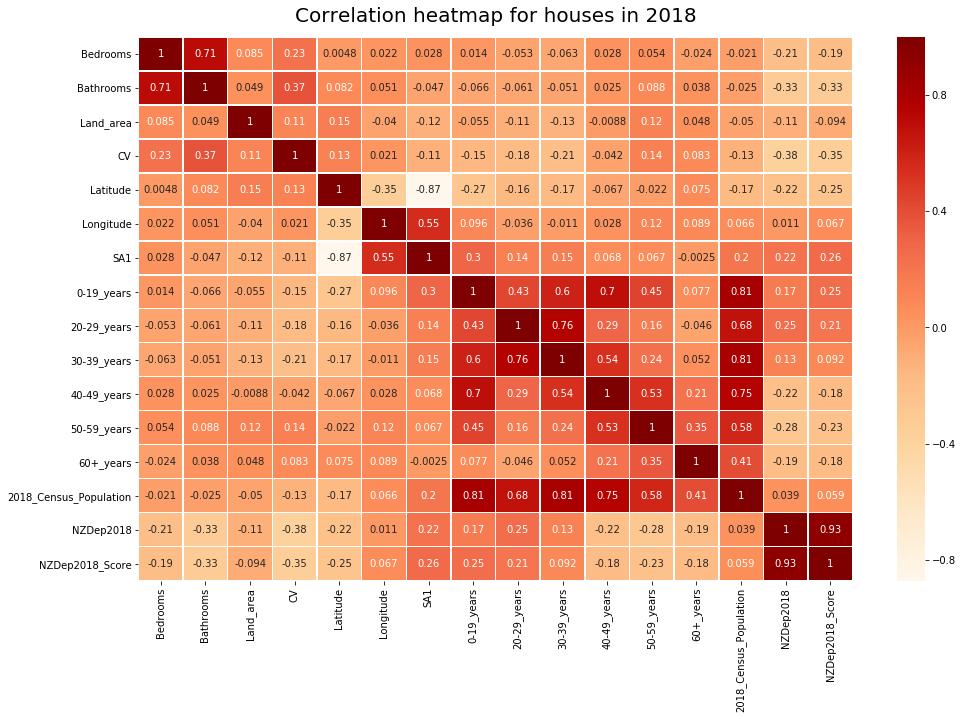

In [73]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = Auckland_Houses_2018.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='OrRd', linewidths=0.5)
plt.title('Correlation heatmap for houses in 2018', pad = 15.0, size = '20')
plt.show()

##### There is a slight negative correlation between the the deprivation index and the ages of the houses. So, this means that the older the age of the house, the more likely it is to be in a less deprived area. This does make sense as large portion of the population are building houses in more deprived areas as the land there is of cheaper values.

##### The older houses are valued at slightly higher price than newer ones since they are probably regarded as antiques, making them more valuable than the newer ones.

##### The theory above is supported by the evidence in the correlation heatmap, where there is a slight positive correlation between age and current value. The higher the age of the house, the more its current value

##### There is also a strong negative correlation between the ages and 2018_Census_population. This lower the age of the house, the higher its population

##### There is also a strong positive correlation between NZDep2018_Score and NZDep2018, which means, the higher the score, the more deprived those areas are


TypeError: Could not convert 0-1920-2930_3940_4950-5960+ to numeric

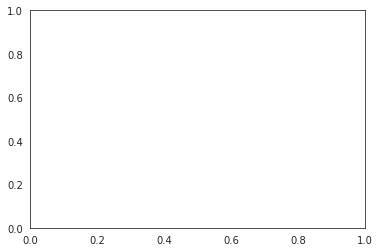

In [17]:
sns.set_style("white")
data = {'x': np.array(['0-19','20-29','30_39','40_49', '50-59', '60+']), 'y': np.array([0.17, 0.25, 0.13, -0.22, -0.28, -0.19]) }
df = pd.DataFrame.from_dict(data)
sns.regplot('x', 'y', data=df)
#plt.plot(x, y, "o-", ms=3,color="r")

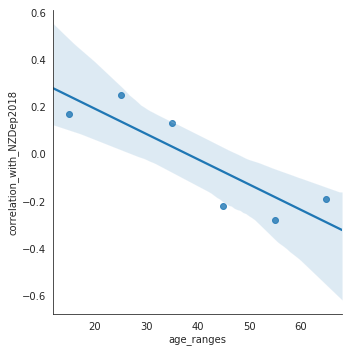

In [24]:
y = [0.17, 0.25, 0.13, -0.22, -0.28, -0.19]
x = [15,25,35,45,55,65]
data = pd.DataFrame(np.array([x,y]).T,
                    columns=["age_ranges", "correlation_with_NZDep2018"])

ax = sns.lmplot(x="age_ranges", y="correlation_with_NZDep2018", data=data)

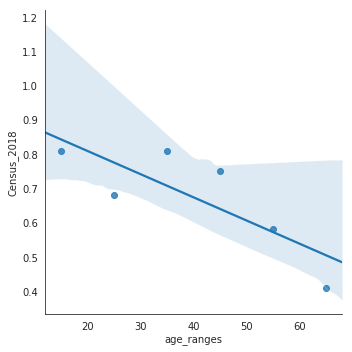

In [26]:
x = [15,25,35,45,55,65]
y = [0.81, 0.68, 0.81, 0.75, 0.58, 0.41]
data = pd.DataFrame(np.array([x,y]).T,
                    columns=["age_ranges", "Census_2018"])

ax = sns.lmplot(x="age_ranges", y="Census_2018", data=data)

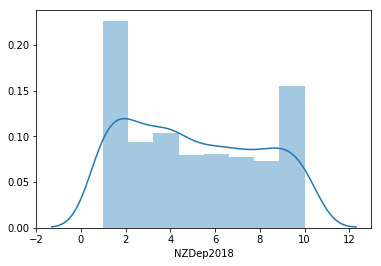

In [30]:
sns.distplot(Auckland_Houses_2018['NZDep2018'])

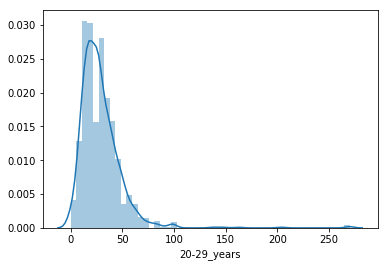

In [31]:
sns.distplot(Auckland_Houses_2018['20-29_years'])

##### As from above, we can see that the 20-29_years age group quite closely resembles a normal distribution with very little variance

In [32]:
sns.boxplot(data=Auckland_Houses_2018, x='NZDep2018', y='2018_Census_Population')

In [35]:
Housing = pd.read_csv('Auckland_Housing_2018_cleaned')
Housing = Housing.drop(['Unnamed: 0'], axis=1)
Housing.head()

Bedrooms  Bathrooms                                    Address  Land_area  \
0         5        3.0  106 Lawrence Crescent Hill Park, Auckland      714.0   
1         5        3.0             8 Corsica Way Karaka, Auckland      564.0   
2         6        4.0     243 Harbourside Drive Karaka, Auckland      626.0   
3         2        1.0  2/30 Hardington Street Onehunga, Auckland       65.0   
4         3        1.0     59 Israel Avenue Clover Park, Auckland      601.0   

        CV   Latitude   Longitude      SA1  0-19_years  20-29_years  \
0   960000 -37.012920  174.904069  7009770          48           27   
1  1250000 -37.063672  174.922912  7009991          42           18   
2  1250000 -37.063580  174.924044  7009991          42           18   
3   740000 -36.912996  174.787425  7007871          42            6   
4   630000 -36.979037  174.892612  7008902          93           27   

   30-39_years  40-49_years  50-59_years  60+_years      Suburbs  \
0           24           21           24         21     Manurewa   
1           12           21           15         30       Karaka   
2           12           21           15         30       Karaka   
3           21           21           12         15     Onehunga   
4           33           30           21         33  Clover Park   

   2018_Census_Population  NZDep2018  NZDep2018_Score  
0                   174.0        6.0            997.0  
1                   129.0        1.0            881.0  
2                   129.0        1.0            881.0  
3                   120.0        2.0            908.0  
4                   231.0        9.0           1091.0

In [36]:
x = Housing.drop(['Address', 'Suburbs', 'NZDep2018'], axis=1)
y = Housing['NZDep2018']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

### Making a machine learning model - Logistic Regression

In [55]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_x, train_y)
predictions = logistic_regression.predict(test_x)

print(confusion_matrix(test_y, predictions))

[[23  7  0  7  0  0  0  1  0  3]
 [19 11  0  6  0  0  0  3  0  0]
 [11  6  0  6  0  0  0  2  0  2]
 [ 6  9  0 10  0  0  0  4  0  5]
 [ 9  6  0  5  0  0  0  1  0  7]
 [ 3  2  0 13  0  0  0  6  0  3]
 [ 5  3  0 10  0  0  0  4  0 10]
 [ 1  2  0  2  0  0  0  8  0  9]
 [ 0  5  0  2  0  0  0  4  0 21]
 [ 3  1  0  3  0  0  0  7  0 16]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
print('Accuracy :', logistic_regression.score(test_x, test_y))
print(' ')
print(metrics.classification_report(test_y, predictions))

Accuracy : 0.21794871794871795
 
              precision    recall  f1-score   support

         1.0       0.29      0.56      0.38        41
         2.0       0.21      0.28      0.24        39
         3.0       0.00      0.00      0.00        27
         4.0       0.16      0.29      0.20        34
         5.0       0.00      0.00      0.00        28
         6.0       0.00      0.00      0.00        27
         7.0       0.00      0.00      0.00        32
         8.0       0.20      0.36      0.26        22
         9.0       0.00      0.00      0.00        32
        10.0       0.21      0.53      0.30        30

   micro avg       0.22      0.22      0.22       312
   macro avg       0.11      0.20      0.14       312
weighted avg       0.12      0.22      0.15       312



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


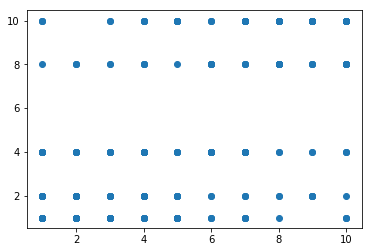

In [58]:
plt.scatter(test_y, predictions)

##### As you can see the Logistic Regression Model returned a score of 22%

### Making a machine learning model - Support Vector Machines

In [59]:
svm = SVC(kernel='rbf')
svm.fit(train_x, train_y)
predictions = svm.predict(test_x)

print(confusion_matrix(test_y, predictions))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[41  0  0  0  0  0  0  0  0  0]
 [38  1  0  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0  0  0]
 [34  0  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  2  0  0  0]
 [22  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0  0  0  1  0]
 [30  0  0  0  0  0  0  0  0  0]]


In [60]:
print('Accuracy :', svm.score(test_x, test_y))
print(' ')
print(metrics.classification_report(test_y, predictions))

Accuracy : 0.14423076923076922
 
              precision    recall  f1-score   support

         1.0       0.13      1.00      0.23        41
         2.0       1.00      0.03      0.05        39
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00        34
         5.0       0.00      0.00      0.00        28
         6.0       0.00      0.00      0.00        27
         7.0       1.00      0.06      0.12        32
         8.0       0.00      0.00      0.00        22
         9.0       1.00      0.03      0.06        32
        10.0       0.00      0.00      0.00        30

   micro avg       0.14      0.14      0.14       312
   macro avg       0.31      0.11      0.05       312
weighted avg       0.35      0.14      0.06       312



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


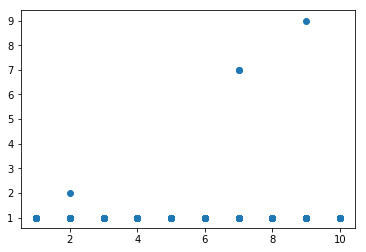

In [61]:
plt.scatter(test_y, predictions)

##### As you can see the SVM returned a score of 14%

### Making a machine learning model - Decision Trees Classifier

In [37]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(train_x, train_y)
predictions = tree.predict(test_x)

print(metrics.confusion_matrix(test_y, predictions))

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  3 25  0  0  0  0  0]
 [ 0  0  0  0  1 26  0  0  0  0]
 [ 0  0  0  0  0  2 30  0  0  0]
 [ 0  0  0  0  0  0  1 21  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 30]]


In [38]:
print('Accuracy :', tree.score(test_x, test_y))
print(' ')
print(metrics.classification_report(test_y, predictions))

Accuracy : 0.9775641025641025
 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        41
         2.0       1.00      1.00      1.00        39
         3.0       1.00      1.00      1.00        27
         4.0       0.92      1.00      0.96        34
         5.0       0.96      0.89      0.93        28
         6.0       0.93      0.96      0.95        27
         7.0       0.97      0.94      0.95        32
         8.0       1.00      0.95      0.98        22
         9.0       1.00      1.00      1.00        32
        10.0       1.00      1.00      1.00        30

   micro avg       0.98      0.98      0.98       312
   macro avg       0.98      0.97      0.98       312
weighted avg       0.98      0.98      0.98       312



In [64]:
plt.scatter(test_y, predictions)

###### As from above, the Decision Trees Classifier returned a score of 98%

### Making a machine learning model - Random Forests Clasisfier

In [65]:
forests = RandomForestClassifier(n_estimators=200, criterion='entropy')
forests.fit(train_x, train_y)
predictions = forests.predict(test_x)

print(confusion_matrix(test_y, predictions))

[[40  0  1  0  0  0  0  0  0  0]
 [ 1 38  0  0  0  0  0  0  0  0]
 [ 0  1 25  1  0  0  0  0  0  0]
 [ 0  0  2 32  0  0  0  0  0  0]
 [ 0  0  0  0 28  0  0  0  0  0]
 [ 0  0  0  0  0 25  2  0  0  0]
 [ 0  0  0  0  0  3 26  2  1  0]
 [ 0  0  0  0  0  0  2 17  3  0]
 [ 0  0  0  0  0  0  1  2 29  0]
 [ 0  0  0  0  0  0  2  0  7 21]]


In [66]:
print('Accuracy :', forests.score(test_x, test_y))
print(' ')
print(metrics.classification_report(test_y, predictions))

Accuracy : 0.9006410256410257
 
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98        41
         2.0       0.97      0.97      0.97        39
         3.0       0.89      0.93      0.91        27
         4.0       0.97      0.94      0.96        34
         5.0       1.00      1.00      1.00        28
         6.0       0.89      0.93      0.91        27
         7.0       0.79      0.81      0.80        32
         8.0       0.81      0.77      0.79        22
         9.0       0.72      0.91      0.81        32
        10.0       1.00      0.70      0.82        30

   micro avg       0.90      0.90      0.90       312
   macro avg       0.90      0.89      0.89       312
weighted avg       0.91      0.90      0.90       312



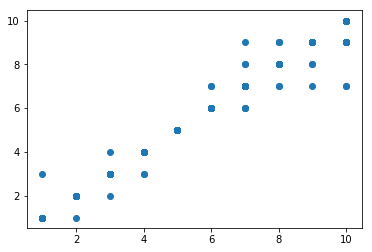

In [67]:
plt.scatter(test_y, predictions)

##### As you can see, the Random Forests Classifier has returned a score of 89.7%

In [ ]:
##'0-19_years', '20-29_years', '30-39_years', '40-49_years', '50-59_years', '60+_years'

In [ ]:
#### Without_NZDep2018Score

In [41]:
x = Housing.drop(['Address', 'Suburbs', 'NZDep2018', 'NZDep2018_Score'], axis=1)
y = Housing['NZDep2018']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

In [83]:
# Logistic Regression

logistic_regression = LogisticRegression()
logistic_regression.fit(train_x, train_y)
predictions = logistic_regression.predict(test_x)
logistic_regression.score(test_x, test_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.21794871794871795

In [87]:
print(metrics.confusion_matrix(test_y, predictions))

[[23 10  4  0  1  1  1  0  1  0]
 [ 6 20  7  2  3  1  0  0  0  0]
 [ 5  8  6  3  1  0  1  1  2  0]
 [ 6  3  5 11  2  4  2  0  0  1]
 [ 2  6  5  4  3  1  2  1  4  0]
 [ 0  0  3  4  3  7  5  1  4  0]
 [ 0  0  3  0  3  2 12  4  7  1]
 [ 0  1  1  0  1  2  2  5  7  3]
 [ 0  1  1  0  2  0  2  6 13  7]
 [ 1  1  1  0  0  3  2  3  6 13]]


In [88]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         1.0       0.53      0.56      0.55        41
         2.0       0.40      0.51      0.45        39
         3.0       0.17      0.22      0.19        27
         4.0       0.46      0.32      0.38        34
         5.0       0.16      0.11      0.13        28
         6.0       0.33      0.26      0.29        27
         7.0       0.41      0.38      0.39        32
         8.0       0.24      0.23      0.23        22
         9.0       0.30      0.41      0.34        32
        10.0       0.52      0.43      0.47        30

   micro avg       0.36      0.36      0.36       312
   macro avg       0.35      0.34      0.34       312
weighted avg       0.37      0.36      0.36       312



In [95]:
# SVM

svm = SVC(kernel='rbf')
svm.fit(train_x, train_y)
predictions = svm.predict(test_x)
svm.score(test_x, test_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.14423076923076922

In [97]:
print(confusion_matrix(test_y, predictions))

[[41  0  0  0  0  0  0  0  0  0]
 [38  1  0  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0  0  0]
 [34  0  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  2  0  0  0]
 [22  0  0  0  0  0  0  0  0  0]
 [31  0  0  0  0  0  0  0  1  0]
 [30  0  0  0  0  0  0  0  0  0]]


In [98]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         1.0       0.13      1.00      0.23        41
         2.0       1.00      0.03      0.05        39
         3.0       0.00      0.00      0.00        27
         4.0       0.00      0.00      0.00        34
         5.0       0.00      0.00      0.00        28
         6.0       0.00      0.00      0.00        27
         7.0       1.00      0.06      0.12        32
         8.0       0.00      0.00      0.00        22
         9.0       1.00      0.03      0.06        32
        10.0       0.00      0.00      0.00        30

   micro avg       0.14      0.14      0.14       312
   macro avg       0.31      0.11      0.05       312
weighted avg       0.35      0.14      0.06       312



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
# Decision Trees Classifier

tree = DecisionTreeClassifier(criterion='gini')
tree.fit(train_x, train_y)
predictions = tree.predict(test_x)
tree.score(test_x, test_y)

0.2980769230769231

In [44]:
print(metrics.confusion_matrix(test_y, predictions))

[[22  4  1  2  2  1  5  2  1  1]
 [ 9 15  3  2  3  3  0  1  3  0]
 [ 3  4  4  2  5  4  1  3  1  0]
 [ 5  0  3  8  3  9  2  1  2  1]
 [ 2  2  4  5  6  2  2  1  3  1]
 [ 3  0  1  2  3  5  3  3  5  2]
 [ 0  3  0  5  4  5 11  3  1  0]
 [ 1  1  2  1  1  3  3  5  4  1]
 [ 0  2  0  0  4  4  5  2  9  6]
 [ 0  1  2  5  0  1  3  4  6  8]]


In [45]:
print(metrics.classification_report(test_y, predictions))

              precision    recall  f1-score   support

         1.0       0.49      0.54      0.51        41
         2.0       0.47      0.38      0.42        39
         3.0       0.20      0.15      0.17        27
         4.0       0.25      0.24      0.24        34
         5.0       0.19      0.21      0.20        28
         6.0       0.14      0.19      0.16        27
         7.0       0.31      0.34      0.33        32
         8.0       0.20      0.23      0.21        22
         9.0       0.26      0.28      0.27        32
        10.0       0.40      0.27      0.32        30

   micro avg       0.30      0.30      0.30       312
   macro avg       0.29      0.28      0.28       312
weighted avg       0.31      0.30      0.30       312



In [92]:
# Random Forests Classifier

forests = RandomForestClassifier(n_estimators=200, criterion='entropy')
forests.fit(train_x, train_y)
predictions = forests.predict(test_x)
forests.score(test_x, test_y)

0.33974358974358976

In [47]:
conf_met = metrics.confusion_matrix(test_y, predictions)

In [94]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         1.0       0.51      0.54      0.52        41
         2.0       0.41      0.49      0.45        39
         3.0       0.19      0.22      0.21        27
         4.0       0.34      0.29      0.32        34
         5.0       0.14      0.11      0.12        28
         6.0       0.21      0.19      0.20        27
         7.0       0.33      0.34      0.34        32
         8.0       0.25      0.23      0.24        22
         9.0       0.32      0.38      0.34        32
        10.0       0.48      0.43      0.46        30

   micro avg       0.34      0.34      0.34       312
   macro avg       0.32      0.32      0.32       312
weighted avg       0.33      0.34      0.34       312

